# Importing Libraries

In [1]:
import pandas as pd
import collections
import numpy as np
import datetime
import pmdarima as pm
import nltk
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')

# Loading Datasets

In [2]:
news_df=pd.read_csv('F:\india-news-headlines.csv')
stocks=pd.read_csv('F:\^BSESN.csv')

In [3]:
news_df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
news_df.shape

(3297172, 3)

The data here is of size 3297172 but we are interested for stocks forecasting of S&P BSE, hence searching for the specific words and selecting the data containing those words only

In [5]:
df = news_df[news_df['headline_text'].str.contains('S&P', regex=False, case=False, na=False) |news_df['headline_text'].str.contains('BSESN', regex=False, case=False, na=False) ]

In [6]:
df.head()

,publish_date,headline_category,headline_text
12580,20010807,business.india-business,S&P downgrade seen to have little impact
12964,20010808,business.india-business,S&P's downgrading attracts mixed reaction
13011,20010808,business.india-business,S&P downgrade will affect FDI; divestment
13596,20010809,business.india-business,S&P lowers rating outlook for banks
28559,20010916,business.international-business,US economy will not collapse; says S&P


# Text Analytics

With the help of text analytics we will remove some unnecessary words which are occuring more times in the dataset and which do not have any value through wordcloud. Along with it we will tend to delete the puctuations as well in order to give proper sentiments to the text

In [7]:
news_combined = " ".join(df.headline_text.values)

In [8]:
news_combined[:200]

"S&P downgrade seen to have little impact S&P's downgrading attracts mixed reaction S&P downgrade will affect FDI; divestment S&P lowers rating outlook for banks US economy will not collapse; says S&P "

In [9]:
word_cloud = WordCloud(width=800,height = 800,background_color='white',max_words=150).\
generate_from_text(news_combined)

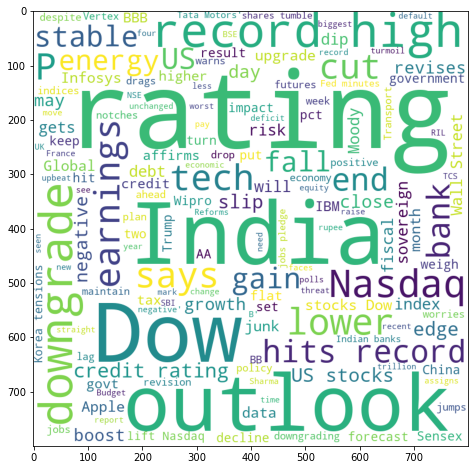

In [10]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [11]:
news_combined.strip("   ")

"S&P downgrade seen to have little impact S&P's downgrading attracts mixed reaction S&P downgrade will affect FDI; divestment S&P lowers rating outlook for banks US economy will not collapse; says S&P S&P affirms India's ratings Sensex slips on war fears; S&P warning No change in India rating; says S&P FIIs exit debt after S&P review S&P to present corporate governance report on Infosys S&P upgrades Telco from negative to stable S&P keeps ratings for currency unchanged Sinha junks S&P; Moody ratings S&P does not change ratings for banks; FIs S&P hikes India's forex rating Correct deficit; S&P tells India S&P wants controlling stake in Crisil S&P buys majority equity in Crisil Credit quality of RIL may weaken: S&P S&P puts India rating under watch S&P's revised outlook fails to cheer India Inc India Inc celebrates S&P's belated move S&P raises India's sovereign rating India; China auto marts carry high risks: S&P S&P assigns BB to SBI's Rs 900cr bond S&P increases Infosys rating M&M arm

In [12]:
sd = news_combined.strip("").split(" ")

In [13]:
fdist = {}
for i in sd:
    fdist[i] = fdist.get(i,0) + 1

In [14]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

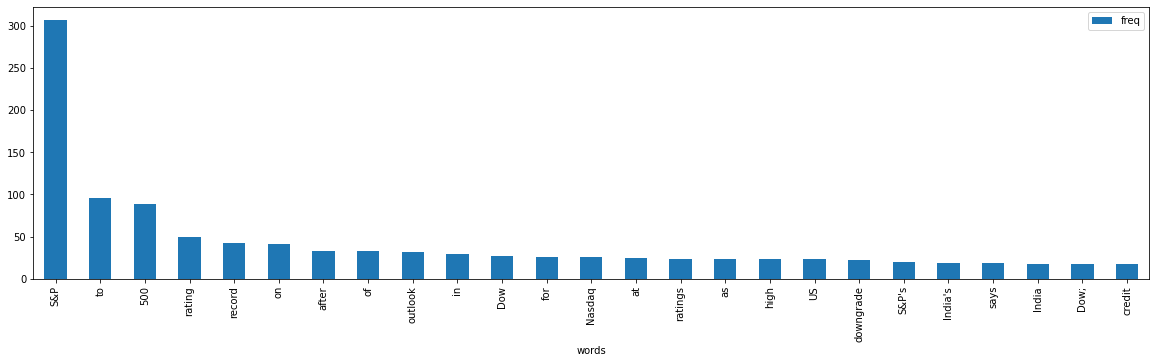

In [15]:
df_dist.sort_values(ascending = False,by='freq').head(25).\
plot.bar(x = "words",y="freq",figsize=(20,5))

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
word_tokenize(news_combined.lower())

['s',
 '&',
 'p',
 'downgrade',
 'seen',
 'to',
 'have',
 'little',
 'impact',
 's',
 '&',
 'p',
 "'s",
 'downgrading',
 'attracts',
 'mixed',
 'reaction',
 's',
 '&',
 'p',
 'downgrade',
 'will',
 'affect',
 'fdi',
 ';',
 'divestment',
 's',
 '&',
 'p',
 'lowers',
 'rating',
 'outlook',
 'for',
 'banks',
 'us',
 'economy',
 'will',
 'not',
 'collapse',
 ';',
 'says',
 's',
 '&',
 'p',
 's',
 '&',
 'p',
 'affirms',
 'india',
 "'s",
 'ratings',
 'sensex',
 'slips',
 'on',
 'war',
 'fears',
 ';',
 's',
 '&',
 'p',
 'warning',
 'no',
 'change',
 'in',
 'india',
 'rating',
 ';',
 'says',
 's',
 '&',
 'p',
 'fiis',
 'exit',
 'debt',
 'after',
 's',
 '&',
 'p',
 'review',
 's',
 '&',
 'p',
 'to',
 'present',
 'corporate',
 'governance',
 'report',
 'on',
 'infosys',
 's',
 '&',
 'p',
 'upgrades',
 'telco',
 'from',
 'negative',
 'to',
 'stable',
 's',
 '&',
 'p',
 'keeps',
 'ratings',
 'for',
 'currency',
 'unchanged',
 'sinha',
 'junks',
 's',
 '&',
 'p',
 ';',
 'moody',
 'ratings',
 's',
 

In [19]:
print(sd[:20])

['S&P', 'downgrade', 'seen', 'to', 'have', 'little', 'impact', "S&P's", 'downgrading', 'attracts', 'mixed', 'reaction', 'S&P', 'downgrade', 'will', 'affect', 'FDI;', 'divestment', 'S&P', 'lowers']


In [21]:
stop_nltk = stopwords.words("english")

In [22]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
stop_updated = stop_nltk + list(punctuation) + ["..."] + ["rating","outlook","record"]

In [24]:
news_updated = [word for word in sd if word not in stop_updated and len(word) > 2]

In [25]:
def clean_txt1(a):
    token= word_tokenize(a.lower())
    news_updated = [word for word in token if word not in stop_updated and len(word) > 2]
    res = " ".join(news_updated)
    return res

In [31]:
df.reset_index(drop=True, inplace=True)

In [32]:
cl_txt2 = []
for i in range(len(df)):
    cl_txt2.append(clean_txt1(df['headline_text'][i]))

In [33]:
df['clean_without_stemming'] = cl_txt2

<ipython-input-33-180c2062a6c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_without_stemming'] = cl_txt2


In [34]:
df.head()

,publish_date,headline_category,headline_text,clean_without_stemming
0,20010807,business.india-business,S&P downgrade seen to have little impact,downgrade seen little impact
1,20010808,business.india-business,S&P's downgrading attracts mixed reaction,downgrading attracts mixed reaction
2,20010808,business.india-business,S&P downgrade will affect FDI; divestment,downgrade affect fdi divestment
3,20010809,business.india-business,S&P lowers rating outlook for banks,lowers banks
4,20010916,business.international-business,US economy will not collapse; says S&P,economy collapse says


In [36]:
stocks.rename(columns={'Date':'publish_date'},inplace=True)

In [37]:
df['publish_date'] =  pd.to_datetime(df['publish_date'], format = '%Y%m%d')

<ipython-input-37-5d03848b0fb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publish_date'] =  pd.to_datetime(df['publish_date'], format = '%Y%m%d')


In [38]:
stocks['publish_date'] =  pd.to_datetime(stocks['publish_date'], format = '%Y-%m-%d')

In [40]:
df.head()

,publish_date,headline_category,headline_text,clean_without_stemming
0,2001-08-07,business.india-business,S&P downgrade seen to have little impact,downgrade seen little impact
1,2001-08-08,business.india-business,S&P's downgrading attracts mixed reaction,downgrading attracts mixed reaction
2,2001-08-08,business.india-business,S&P downgrade will affect FDI; divestment,downgrade affect fdi divestment
3,2001-08-09,business.india-business,S&P lowers rating outlook for banks,lowers banks
4,2001-09-16,business.international-business,US economy will not collapse; says S&P,economy collapse says


# Sentiment Analysis

Sentiment Analysis using vader sentiment analysis

In [41]:
analyser = SentimentIntensityAnalyzer()

In [42]:
def vader_sentiment(a):
    res = analyser.polarity_scores(a)['compound']
    return res

In [43]:
df['vader'] =df.clean_without_stemming.apply(vader_sentiment)
df['sent_prediction_vader'] = df.vader.apply(lambda x:1 if x>0 else 0)
df.head()

<ipython-input-43-1d1e12e06044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vader'] =df.clean_without_stemming.apply(vader_sentiment)
<ipython-input-43-1d1e12e06044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_prediction_vader'] = df.vader.apply(lambda x:1 if x>0 else 0)


,publish_date,headline_category,headline_text,clean_without_stemming,vader,sent_prediction_vader
0,2001-08-07,business.india-business,S&P downgrade seen to have little impact,downgrade seen little impact,0.0000,0
1,2001-08-08,business.india-business,S&P's downgrading attracts mixed reaction,downgrading attracts mixed reaction,0.4019,1
2,2001-08-08,business.india-business,S&P downgrade will affect FDI; divestment,downgrade affect fdi divestment,0.0000,0
3,2001-08-09,business.india-business,S&P lowers rating outlook for banks,lowers banks,-0.1280,0
4,2001-09-16,business.international-business,US economy will not collapse; says S&P,economy collapse says,-0.4939,0


In [44]:
df1=df[['publish_date','sent_prediction_vader']]

In [45]:
df1

,publish_date,sent_prediction_vader
0,2001-08-07,0
1,2001-08-08,1
2,2001-08-08,0
3,2001-08-09,0
4,2001-09-16,0
...,...,...
338,2019-02-12,0
339,2019-07-08,1
340,2019-10-24,0
341,2019-12-18,0


In [46]:
df_total=pd.merge(df1,stocks,how='inner')

In [47]:
df_total.fillna(0, inplace=True)  

In [48]:
df_total.reset_index(drop=True,inplace=True)

In [49]:
df_total.tail()

,publish_date,sent_prediction_vader,Open,High,Low,Close,Adj Close,Volume
244,2018-11-05,0,35118.621094,35123.410156,34811.601563,34950.921875,34950.921875,22200.0
245,2019-02-12,0,36405.718750,36465.398438,36113.910156,36153.621094,36153.621094,12200.0
246,2019-07-08,1,39476.378906,39476.378906,38605.480469,38720.570313,38720.570313,22000.0
247,2019-10-24,0,39223.011719,39327.148438,38840.761719,39020.390625,39020.390625,36600.0
248,2019-12-18,0,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0


# Forecasting 

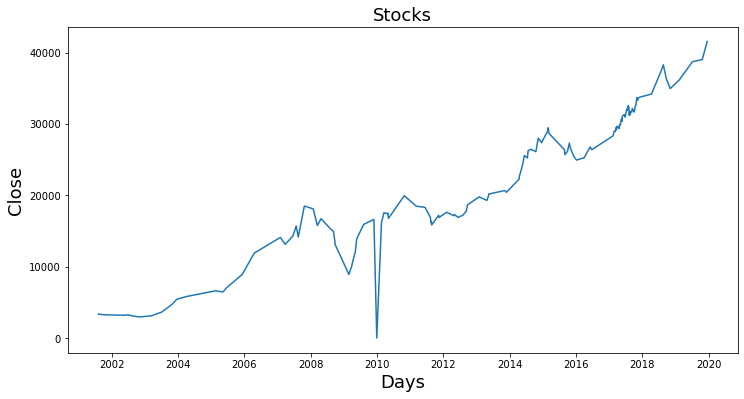

In [50]:
plt.figure(figsize=(12,6))
plt.title('Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(df_total['publish_date'],df_total['Close'])
plt.show()

In [56]:
data=df_total[['Close','sent_prediction_vader']]

In [66]:
df_total

,publish_date,sent_prediction_vader,Open,High,Low,Close,Adj Close,Volume
0,2001-08-07,0,3322.810059,3345.979980,3317.439941,3319.669922,3319.669922,0.0
1,2001-08-08,1,3317.510010,3321.179932,3294.189941,3302.320068,3302.320068,0.0
2,2001-08-08,0,3317.510010,3321.179932,3294.189941,3302.320068,3302.320068,0.0
3,2001-08-09,0,3290.860107,3324.959961,3279.620117,3319.610107,3319.610107,0.0
4,2001-11-20,0,3296.169922,3326.760010,3223.989990,3231.659912,3231.659912,0.0
...,...,...,...,...,...,...,...,...
244,2018-11-05,0,35118.621094,35123.410156,34811.601563,34950.921875,34950.921875,22200.0
245,2019-02-12,0,36405.718750,36465.398438,36113.910156,36153.621094,36153.621094,12200.0
246,2019-07-08,1,39476.378906,39476.378906,38605.480469,38720.570313,38720.570313,22000.0
247,2019-10-24,0,39223.011719,39327.148438,38840.761719,39020.390625,39020.390625,36600.0


In [90]:
df_sub0 = df_total[df_total['sent_prediction_vader']==0]
df_sub1 = df_total[df_total['sent_prediction_vader']==1]

In [91]:
df_sub0

,publish_date,sent_prediction_vader,Open,High,Low,Close,Adj Close,Volume
0,2001-08-07,0,3322.810059,3345.979980,3317.439941,3319.669922,3319.669922,0.0
2,2001-08-08,0,3317.510010,3321.179932,3294.189941,3302.320068,3302.320068,0.0
3,2001-08-09,0,3290.860107,3324.959961,3279.620117,3319.610107,3319.610107,0.0
4,2001-11-20,0,3296.169922,3326.760010,3223.989990,3231.659912,3231.659912,0.0
5,2002-05-21,0,3266.159912,3266.159912,3127.870117,3186.530029,3186.530029,0.0
...,...,...,...,...,...,...,...,...
243,2018-09-24,0,36924.718750,36945.500000,36216.949219,36305.019531,36305.019531,23300.0
244,2018-11-05,0,35118.621094,35123.410156,34811.601563,34950.921875,34950.921875,22200.0
245,2019-02-12,0,36405.718750,36465.398438,36113.910156,36153.621094,36153.621094,12200.0
247,2019-10-24,0,39223.011719,39327.148438,38840.761719,39020.390625,39020.390625,36600.0


In [92]:
data_new0=df_sub0[['Close','publish_date']]
data_new1=df_sub1[['Close','publish_date']]

In [93]:
data_new0=data_new0.set_index('publish_date')

In [94]:
data_new1=data_new1.set_index('publish_date')

## Forecasting for the stocks having sentiment 0 for next 2 years

In [95]:
model=pm.auto_arima(data_new0,start_p=1,start_q=1,
                   test='adf',
                   max_p=3,max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2911.380, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2911.451, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2909.442, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2909.415, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2917.223, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2911.597, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2914.598, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2913.334, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.583 seconds


In [96]:
n_periods = 24 # in months
fitted, confint = model.predict(n_periods=n_periods,return_conf_int = True)

In [97]:
index_of_fc = pd.date_range(data_new0.index[-1],periods = n_periods,freq='MS')

In [98]:
fitted_series = pd.Series(fitted,index = index_of_fc)
lower_series = pd.Series(confint[:,0],index = index_of_fc)
upper_series = pd.Series(confint[:,1],index = index_of_fc)

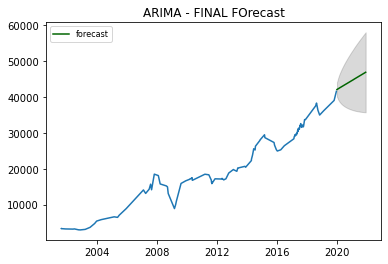

In [100]:
plt.plot(data_new0)
plt.plot(fitted_series,label='forecast',color='darkgreen')
plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.title("ARIMA - FINAL FOrecast")
plt.show()

## Forecasting for the stocks having sentiment 1 for next 2 years

In [101]:
model=pm.auto_arima(data_new1,start_p=1,start_q=1,
                   test='adf',
                   max_p=3,max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1373.669, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1380.327, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1376.772, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1374.490, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1380.213, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1375.658, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1374.331, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1380.248, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1380.238, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.225 seconds


In [102]:
n_periods = 24 # in months
fitted, confint = model.predict(n_periods=n_periods,return_conf_int = True)
index_of_fc = pd.date_range(data_new1.index[-1],periods = n_periods,freq='MS')
fitted_series = pd.Series(fitted,index = index_of_fc)
lower_series = pd.Series(confint[:,0],index = index_of_fc)
upper_series = pd.Series(confint[:,1],index = index_of_fc)

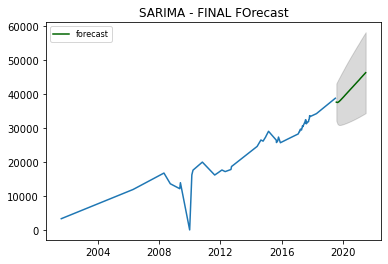

In [103]:
plt.plot(data_new1)
plt.plot(fitted_series,label='forecast',color='darkgreen')
plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left',fontsize=8)
plt.title("SARIMA - FINAL FOrecast")
plt.show()